In [2]:
import qiskit
import matplotlib

from qiskit import QuantumCircuit, assemble, Aer, circuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

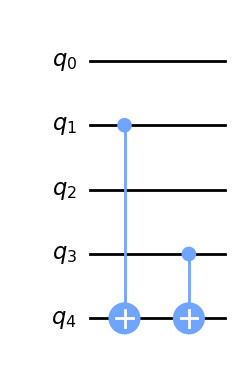

In [3]:
#BUILDING THE BERNSTEIN-VAZIRANI ORACLE

#let's say the code word we're trying to guess is four bits in length, we need an extra bit after that
#to see the response we get from the oracle
n = 5
vaz_oracle = QuantumCircuit(n)

#let our code for today be 0101
vaz_oracle.cx(1, 4)
vaz_oracle.cx(3, 4)

vaz_oracle.draw()


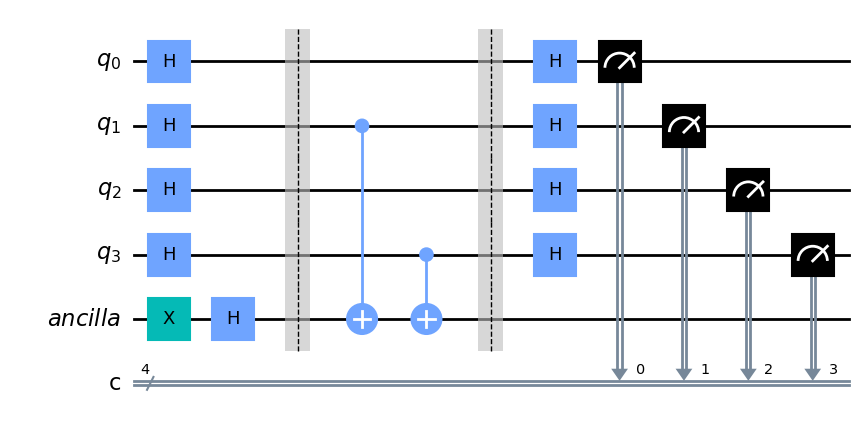

In [4]:
qr = QuantumRegister(4, 'q')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(4, 'c')
experiment = QuantumCircuit(qr, anc, cr)

experiment.x(anc[0])
experiment.h(anc[0])
experiment.h(qr[0:4])

#Consider everything inside the two barriers "hidden"
experiment.barrier(qr, anc)
experiment.cx(qr[1], anc[0])
experiment.cx(qr[3], anc[0])
experiment.barrier(qr, anc)

experiment.h(qr[0:4])

experiment.measure(qr, cr)

experiment.draw()

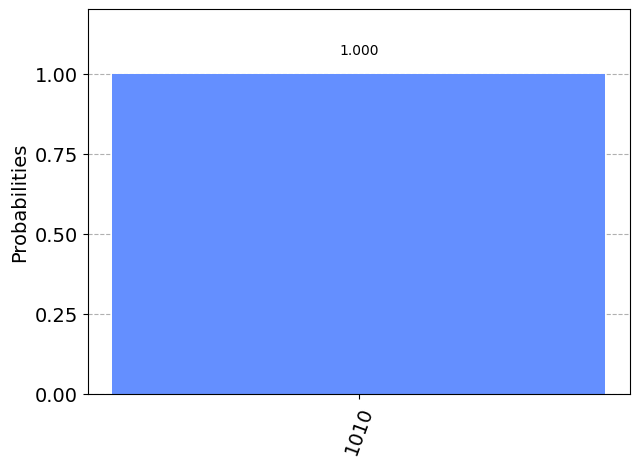

In [5]:
# We begin by declaring a simulator for our circuit to run on
sim = Aer.get_backend('aer_simulator') 
# We run the simulator with sim.run(QUANTUM CIRCUIT),
# And we get the resulting values with .result()
result = sim.run(experiment).result()
# We then collect the results using .get_counts()
counts = result.get_counts()
# Visualization
plot_histogram(counts)